# **Step 1: Notebook to Create ML Model**

### **Installing `scikit-learn`**

1. To install `scikit-learn` using `pip`, run the following command: `pip install -U scikit-learn`
2. To install `scikit-learn` using `conda`, run the following command: `conda install -c conda-forge scikit-learn`

In [50]:
pip install pandas numpy matplotlib seaborn scikit-learn jupyterlab

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: C:\Users\rithv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


---


### **Import Libraries**

In [51]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

from mapie.regression import SplitConformalRegressor
from mapie.metrics.regression import regression_coverage_score

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

### **Load Dataset as DataFrame**

In [52]:
airlines_df = pd.read_csv('airline.csv')
airlines_df.head()

,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,...,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,dissatisfied,Loyal Customer,48,Personal Travel,Eco,4001,1,1,1,1,...,1,1,4,1,1,4,2,1,16,0
1,dissatisfied,Loyal Customer,48,Personal Travel,Eco,3980,1,1,1,1,...,4,4,2,3,2,3,2,4,0,0
2,dissatisfied,Loyal Customer,40,Personal Travel,Eco,2251,1,1,1,1,...,1,1,3,3,2,1,1,1,0,8
3,dissatisfied,Loyal Customer,46,Personal Travel,Eco,2453,1,1,1,1,...,5,3,1,4,1,2,2,3,3,15
4,dissatisfied,Loyal Customer,63,Personal Travel,Eco,2011,1,1,1,1,...,5,5,1,5,2,1,2,5,25,25


In [53]:
# Dropping null values
airlines_df.dropna(inplace = True)
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119255 entries, 0 to 119254
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       119255 non-null  object
 1   customer_type                      119255 non-null  object
 2   age                                119255 non-null  int64 
 3   type_of_travel                     119255 non-null  object
 4   class                              119255 non-null  object
 5   flight_distance                    119255 non-null  int64 
 6   seat_comfort                       119255 non-null  int64 
 7   departure_arrival_time_convenient  119255 non-null  int64 
 8   food_and_drink                     119255 non-null  int64 
 9   gate_location                      119255 non-null  int64 
 10  inflight_wifi_service              119255 non-null  int64 
 11  inflight_entertainment             119255 non-null  

In [54]:
airlines_df['satisfaction'].value_counts(normalize = True)

satisfaction
satisfied       0.541436
dissatisfied    0.458564
Name: proportion, dtype: float64

### **Select Input and Output Features**

In [55]:
# Output column for prediction
output = airlines_df['satisfaction'] 

# Input columns
input = airlines_df.drop(columns = ['satisfaction'])

### **One-hot Encoding to Handle Categorical Variables**

`pd.get_dummies()` is a Pandas function that converts categorical variables into numeric (dummy) variables.

In [56]:
input_encoded = pd.get_dummies(input, dtype=int)

input_encoded.head()

,age,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,...,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
0,48,4001,1,1,1,1,1,1,1,1,...,1,16,0,1,0,0,1,0,1,0
1,48,3980,1,1,1,1,4,1,4,4,...,4,0,0,1,0,0,1,0,1,0
2,40,2251,1,1,1,1,1,1,1,1,...,1,0,8,1,0,0,1,0,1,0
3,46,2453,1,1,1,1,3,1,5,3,...,3,3,15,1,0,0,1,0,1,0
4,63,2011,1,1,1,1,5,1,5,5,...,5,25,25,1,0,0,1,0,1,0


### **Data Partitioning**

In [57]:
train_X, test_X, train_y, test_y = train_test_split(input_encoded, output, test_size = 0.2, random_state = 1) 

- `test_size`: Amount of data to be used for testing.

- `random_state`: Sets a seed for random number generation, ensuring the split is reproducible (same train/test sets every time you run it)

## **Prediction Modeling using Decision Tree**

In [58]:
# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

### **Model Evaluation**

#### **Evaluation on Train Set**

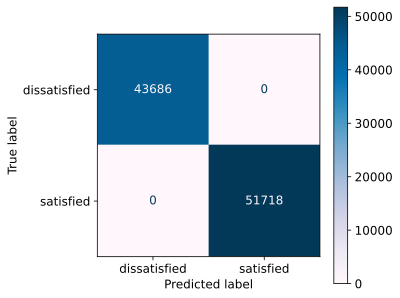

In [59]:
# Predictions on training set
y_pred_train = clf.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, y_pred_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

#### **Evaluation on Test Set**

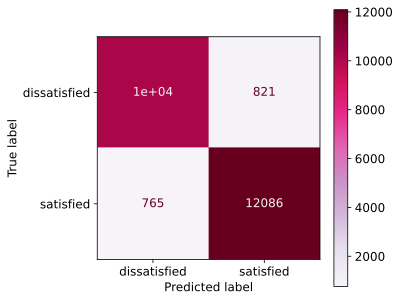

In [60]:
# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat.svg", bbox_inches = 'tight');

**Choosing Colormaps in Matplotlib**: [**Check this link**](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

#### **Classification Report**

In [61]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('class_report.csv') 

#### **Feature Importance Analysis**

It helps answer questions like:
**“Which features are most important in determining the output?”**

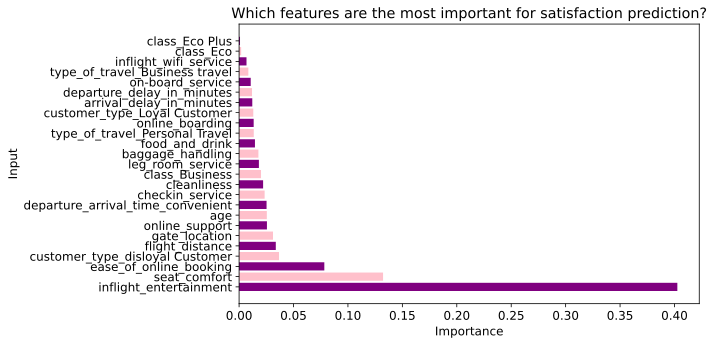

In [62]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input")
plt.title('Which features are the most important for satisfaction prediction?') 
plt.tight_layout()
plt.savefig("satisfaction_imp.svg");

## **Save Your Prediction Model**

**Using Pickle**

 <img src="https://d33wubrfki0l68.cloudfront.net/0f66116c250285870171e38f309161bafc25f06b/dbd4c/assets/images/posts/pickled-cabbage.jpg" width="350" style="float: center"/>

**Pickle** is a useful Python tool that allows you to save your ML models, to minimise lengthy re-training and allow you to share, commit, and re-load pre-trained machine learning models.

In [63]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_airline.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 